In [58]:
import pandas
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

data = pandas.read_csv("cardio_train.csv.zip", sep=";")

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<AxesSubplot:>

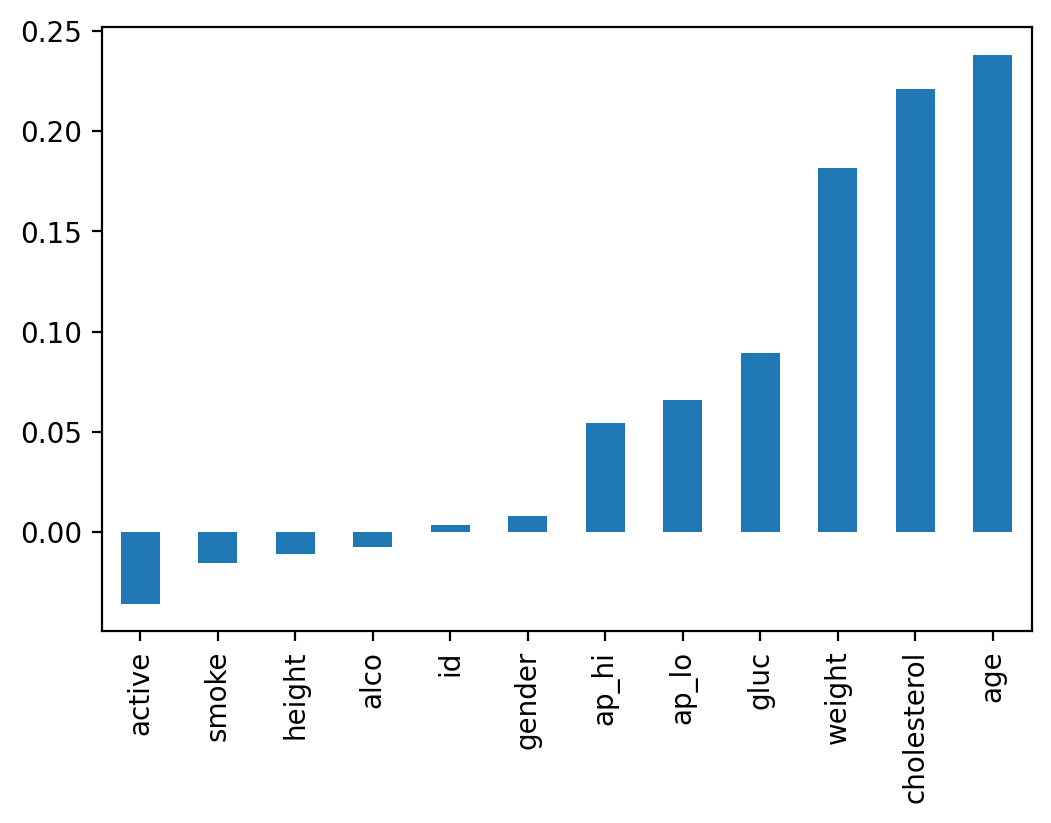

In [76]:
data.corr()['cardio'].sort_values()[:-1].plot.bar()

<AxesSubplot:>

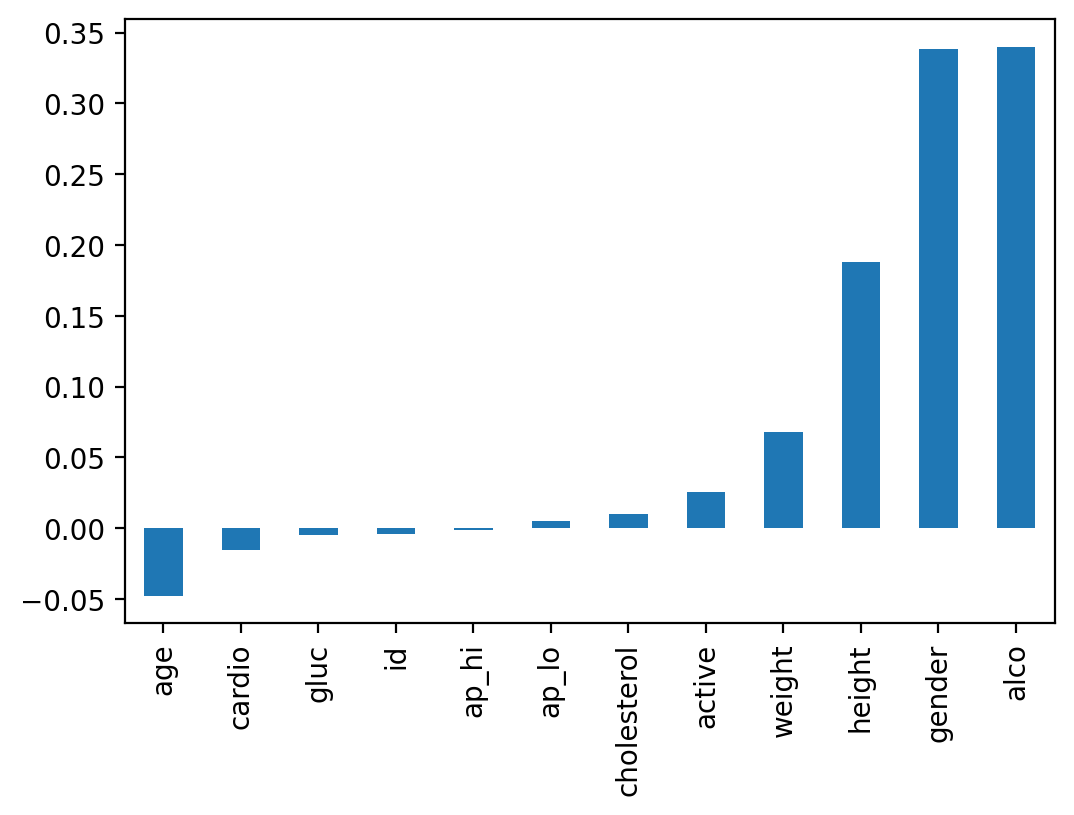

In [77]:
data.corr()['smoke'].sort_values()[:-1].plot.bar()

In [78]:
data[['alco', 'active', 'smoke']].mean()

alco      0.053771
active    0.803729
smoke     0.088129
dtype: float64

In [62]:
import statsmodels.formula.api as smf

In [82]:
fit_results = smf.logit("cardio ~ smoke", data).fit()
fit_results.summary2()

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: cardio           AIC:              97027.7864
Date:               2022-06-06 09:24 BIC:              97046.0989
No. Observations:   70000            Log-Likelihood:   -48512.   
Df Model:           1                LL-Null:          -48520.   
Df Residuals:       69998            LLR p-value:      4.1673e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     3.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.0084    0.0079   1.0647  0.2870  -0.0071   0.0239
smoke         -0.1093    0.0267  -4.0956  0.0000  -0.1617  -0.0570
=================================================================

"""

In [83]:
fit_results = smf.logit("cardio ~ smoke + age", data).fit()
fit_results.summary2()

Optimization terminated successfully.
         Current function value: 0.664168
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.042     
Dependent Variable: cardio           AIC:              92989.5481
Date:               2022-06-06 09:25 BIC:              93017.0168
No. Observations:   70000            Log-Likelihood:   -46492.   
Df Model:           2                LL-Null:          -48520.   
Df Residuals:       69997            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -3.9221    0.0645  -60.8510  0.0000  -4.0484  -3.7957
smoke        -0.0309    0.0275   -1.1220  0.2619  -0.0848   0.0231
age           0.0002    0.0000   61.5588  0.0000   0.0002   0.0002
=================================================================

"""

In [85]:
fit_results = smf.logit("cardio ~ smoke + age + weight + C(cholesterol)", data).fit()
fit_results.summary2()

Optimization terminated successfully.
         Current function value: 0.633124
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.087     
Dependent Variable:  cardio            AIC:               88649.4216
Date:                2022-06-06 10:26  BIC:               88704.3591
No. Observations:    70000             Log-Likelihood:    -44319.   
Df Model:            5                 LL-Null:           -48520.   
Df Residuals:        69994             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           -5.4831   0.0802 -68.3282 0.0000 -5.6403 -5.3258
C(cholesterol)[T.2]  0.5638   0.0236  23.9339 0.0000  0.5176  0.6100
C(cholesterol)[T.3]  1.1555   0.0286  40.3974 0.0000  1.0994  1.2115
smoke               -0.1436   0.0285  -5.0411 0.0000 -0.1995 -0.0878
age                  0.0002   0.0000  53.8369 0.0000  0.0002  0.0002
weight               0.0236   0.0006  39.8988 0.0000  0.0225  0.0248
====================================================================

"""